# **Rapport PIAE - Analyse de son**
## Tom GERMAIN, Hugo LE CARDINAL, Andrea ZANCHETTA

## 1. Introduction

## 2. Méthodes

## 3. Résultats 

## 4. Discussion

## Partie 0
### Incertitudes Capteur

## **Partie 1**
### Comparaison du timbre de la guitare et piano

*Généralement, lorsqu'un instrument de musique est joué, le son n'apparaît pas immédiatement après l'action. Inversement, le son disparaît progressivement après qu'un niveau a été maintenu pendant un certain temps (voir la figure x sur l'annonce de l'enveloppe). Le processus de changement d'amplitude dans le temps est appelé « enveloppe » et est classé en quatre parties : l'attaque, la décroissance, le maintien et le relâchement. L'attaque représente le processus de montée pour atteindre l'amplitude maximale après la génération du son. Le processus d'intensité maximale jusqu'à l'état de maintien est appelé décroissance. Le maintien est le moment où le son conserve plus ou moins son volume et le processus de disparition du son est appelé relâchement.
L'attaque est le facteur le plus influent sur la clarté parmi les 4 autres parties. Le relâchement est un facteur important dans la perception de la réverbération de l'instrument. L'attaque a également la plus grande influence sur la sonorité de l'instrument. Le violon et la harpe sont des instruments typiques avec un long relâchement dans son enve-lope tandis que l'attaque rapide est caractérisée par des instruments tels que le piano, la batterie et le xylophone (instruments percussifs).*

### 1.1 Étude de l'enveloppe guitare et piano

-  guitare
-  piano
-  bonus: influence de la note touché sur la caracteristique de son

1. Pour caractériser notre son sous un enveloppe segmenté, nous allons d’abord faire un contour autour de l’amplitude du signal à chaque pas de temps, nous faisons l’absolue afin d’obtenir l’enveloppe supé-rieur du signal.
 
2. Nous identifions 5 points ce qui fait 4 segments. Le premier point marque le début de la génération du son. Le deuxième marque l’amplitude maximale de cette génération de son. Le troisième point signifie le changement de pente dans la chute de l’amplitude de ce son. Et puis, le quatrième identifie le moment où on arrête de générer le son, et le dernier point marque l’extinction complet du son.

In [6]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

In [47]:
def prepare_audio(file_name, start_time, end_time, sr):
    y, sr = librosa.load(file_name, sr=sr)
    y = y[round(sr*start_time):round(sr*end_time)]
    return y

def compute_envelope(y, sr, win_len_sec=0.01,):
    """Computation of a signal's envelopes
    Args:
        y (np.ndarray): Signal (waveform) to be analyzed
        win_len_sec (float): Length (seconds) of the window (Default value = 0.01)
        sr (scalar): Sampling rate (Default value = 22050)

    Returns:
        env (np.ndarray): Magnitude envelope
    """
    win_len_half = round(win_len_sec * sr * 0.5)
    N = y.shape[0]
    env = np.zeros(N)
    for i in range(N):
        i_start = max(0, i - win_len_half)
        i_end = min(N, i + win_len_half)
        env[i] = np.amax(np.abs(y)[i_start:i_end])
    return env

<div class="alert alert-block alert-info">
Il s'agit d'une analyse qualitative.<br>
Nous avons limité l'analyse au même registre afin de limiter les nombreux factor de notre mesures
Il faut qu'on joue de façon similaire.<br>
C'est-à-dire que l'amplitude max de notre enregistrement doit être similaire (une différence d'environ 5%) qui réflet une note joué de même 'intensité'.
</div>

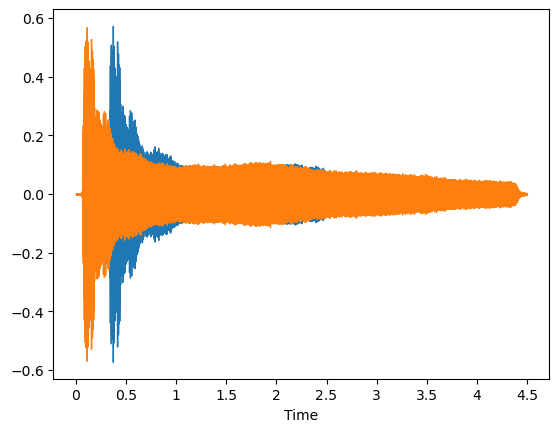

In [72]:
# pour la guitare
sr = 44100
y_guitar = prepare_audio("Audio/GuitarAplucklength.wav", 11.4, 14.2, sr) 

x_guitar = np.arange(11.4*sr,14.2*sr)
librosa.display.waveshow(y_guitar, sr=sr)

y_guitar2 = prepare_audio("Audio/GuitarAplucklength.wav", 15, 19.5, sr) 

x_guitar2 = np.arange(15*sr,19.5*sr)
librosa.display.waveshow(y_guitar2, sr=sr)

In [62]:
env_guitar = compute_envelope(y_guitar, sr)

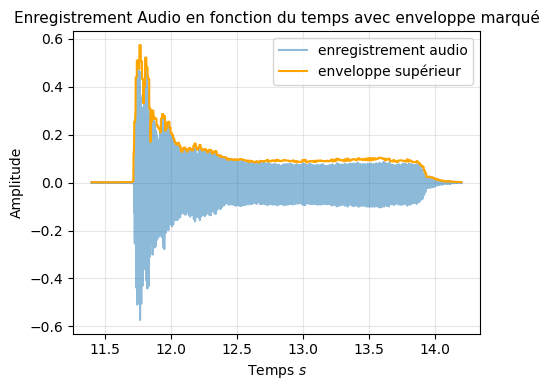

In [65]:
# figure 1 - enregistrement audio avec son envelope
# Create figure
fig, ax = plt.subplots(1,1, figsize=(5,4))
ax.plot(x_guitar/sr, y_guitar, alpha=0.5, label="enregistrement audio")
ax.plot(x_guitar/sr, env_guitar, 'orange', label="enveloppe supérieur")
ax.set_title("Enregistrement Audio en fonction du temps avec enveloppe marqué",  fontsize=11)
ax.set_xlabel(r"Temps $s$", fontsize=10)
ax.set_ylabel("Amplitude", fontsize=10)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()

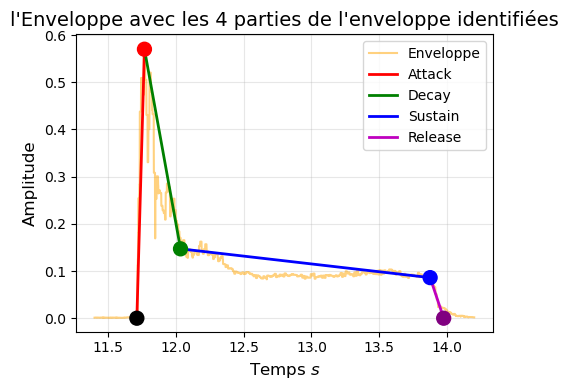

In [69]:
adsr_guitar = np.array([[11.712, 0], [11.768, 0.57], [12.034, 0.147], [13.875, 0.086], [13.975, 0]])

# Create figure
fig, ax = plt.subplots(1,1, figsize=(5,4))

# Plot the envelope
ax.plot(x_guitar/sr, env_guitar, 'orange', alpha=0.5, label='Enveloppe')

# Plot ADSR stages with different colors
# Attack (from start to peak)
ax.plot(adsr_guitar[0:2,0], adsr_guitar[0:2,1], 'r-', linewidth=2, label='Attack')
# Decay (from peak to sustain level)
ax.plot(adsr_guitar[1:3,0], adsr_guitar[1:3,1], 'g-', linewidth=2, label='Decay')
# Sustain (constant level)
ax.plot(adsr_guitar[2:4,0], adsr_guitar[2:4,1], 'b-', linewidth=2, label='Sustain')
# Release (from sustain to zero)
ax.plot(adsr_guitar[3:5,0], adsr_guitar[3:5,1], 'm-', linewidth=2, label='Release')

# Mark the key points
ax.scatter(adsr_guitar[:,0], adsr_guitar[:,1], c=['black', 'red', 'green', 'blue', 'purple'], s=100, zorder=5)

# Add labels and title
ax.set_title("l'Enveloppe avec les 4 parties de l'enveloppe identifiées", fontsize=14)
ax.set_xlabel(r"Temps $s$", fontsize=12)
ax.set_ylabel("Amplitude", fontsize=12)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("figure 2")
plt.show()


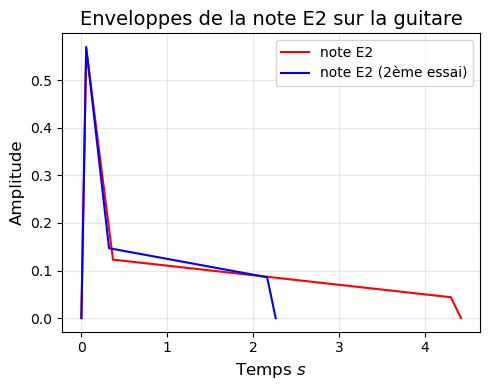

In [71]:
# adsr_guitar = np.array([[17.55, 0], [17.58, 0.8], [18.05, 0.112], [22.86, 0.018], [23, 0]])

# adsr_guitar2 = np.array([[3.65, 0], [3.71, 0.5], [4.20, 0.184], [10.38, 0.041], [10.45, 0]])

adsr_guitar = np.array([[11.712, 0], [11.768, 0.57], [12.034, 0.147], [13.875, 0.086], [13.975, 0]])

adsr_guitar2 = np.array([[15.05, 0], [15.106, 0.566], [15.418, 0.123], [19.352, 0.044], [19.471, 0]])

def process_adsr_norm(arr):
    arr[:,0] = arr[:,0]-arr[0,0] # relative to 0
    #arr[:,1] = arr[:,1]/arr[1,1] # normal the max value to 1

process_adsr_norm(adsr_guitar)
process_adsr_norm(adsr_guitar2)

# figure 3 - avec courbe simplifie de l'enveloppe
fig, ax = plt.subplots(1,1, figsize=(5,4))
ax.set_title("Enveloppes de la note E2 sur la guitare", fontsize=14)
ax.set_xlabel(r"Temps $s$", fontsize=12)
ax.set_ylabel("Amplitude", fontsize=12)
ax.plot(adsr_guitar2[:,0], adsr_guitar2[:,1], 'r-', label="note E2")
ax.plot(adsr_guitar[:,0], adsr_guitar[:,1], 'b-', label="note E2 (2ème essai)")

ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("figure 3")

on constate que nous avons pu faire 2 éssai enrègistrement avec un amplitude maximal similaire.

Avec le piano maintenant..

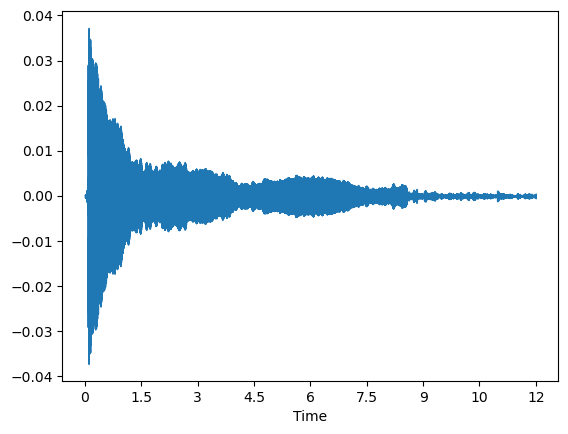

In [12]:
sr = 44100
y_f4 = prepare_audio("Audio_HD/F4.wav", 1, 7, sr=sr)
x1 = np.arange(1*sr,7*sr)
librosa.display.waveshow(y_f4)


In [25]:
env_f4 = compute_envelope(y_f4, sr=sr)

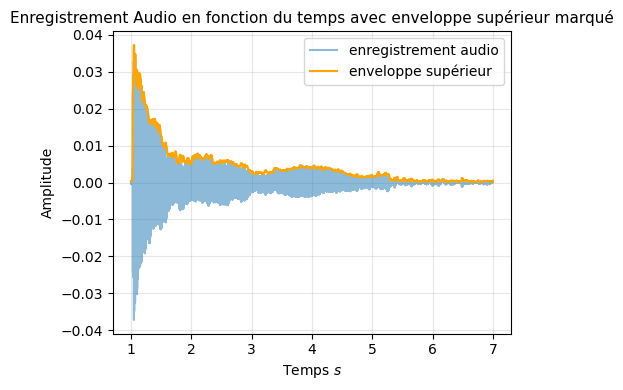

In [26]:
# figure 1 - enregistrement audio avec son envelope
# Create figure
fig, ax = plt.subplots(1,1, figsize=(5,4))
ax.plot(x1/sr, y_f4, alpha=0.5, label="enregistrement audio")
ax.plot(x1/sr, env_f4, 'orange', label="enveloppe supérieur")
ax.set_title("Enregistrement Audio en fonction du temps avec enveloppe supérieur marqué",  fontsize=11)
ax.set_xlabel(r"Temps $s$", fontsize=10)
ax.set_ylabel("Amplitude", fontsize=10)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()

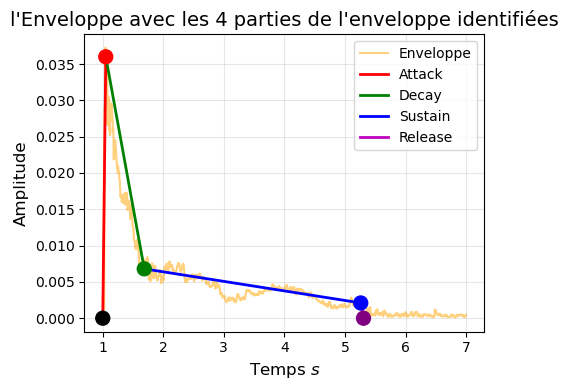

In [33]:
# on note certains points distinctes
adsr_points_f4 = np.array([[4.42e4, 0], [4.64e4, 0.036], [7.44e4, 0.0068], [23.2e4, 0.0021], [23.4e4, 0]])

# Convert to seconds
adsr_points_f4_sec = adsr_points_f4.copy()
adsr_points_f4_sec[:,0] = adsr_points_f4[:,0]/sr

# Create figure
fig, ax = plt.subplots(1,1, figsize=(5,4))

# Plot the envelope
ax.plot(x1/sr, env_f4, 'orange', alpha=0.5, label='Enveloppe')

# Plot ADSR stages with different colors
# Attack (from start to peak)
ax.plot(adsr_points_f4_sec[0:2,0], adsr_points_f4_sec[0:2,1], 'r-', linewidth=2, label='Attack')
# Decay (from peak to sustain level)
ax.plot(adsr_points_f4_sec[1:3,0], adsr_points_f4_sec[1:3,1], 'g-', linewidth=2, label='Decay')
# Sustain (constant level)
ax.plot(adsr_points_f4_sec[2:4,0], adsr_points_f4_sec[2:4,1], 'b-', linewidth=2, label='Sustain')
# Release (from sustain to zero)
ax.plot(adsr_points_f4_sec[3:5,0], adsr_points_f4_sec[3:5,1], 'm-', linewidth=2, label='Release')

# Mark the key points
ax.scatter(adsr_points_f4_sec[:,0], adsr_points_f4_sec[:,1], c=['black', 'red', 'green', 'blue', 'purple'], s=100, zorder=5)

# Add labels and title
ax.set_title("l'Enveloppe avec les 4 parties de l'enveloppe identifiées", fontsize=14)
ax.set_xlabel(r"Temps $s$", fontsize=12)
ax.set_ylabel("Amplitude", fontsize=12)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("figure 2")
plt.show()

In [ ]:
# # figure 3 - avec courbe simplifie de l'enveloppe
# fig, ax = plt.subplots(1,1, figsize=(10,6))
# ax.plot(adsr_f4[:,0]/sr/10e-5, adsr_f4[:,1])
# ax.set_title("Enveloppe normalisé des differents enregistrement audio", fontsize=14)
# ax.set_xlabel(r"Temps $s$", fontsize=12)
# ax.set_ylabel("Amplitude", fontsize=12)
# plt.plot(adsr_c2[:,0]/sr/10e-5, adsr_c2[:,1], 'r-', label="note C2")
# #ax.scatter(adsr_c2[:,0]/sr/10e-5, adsr_c2[:,1], c=['black', 'red', 'green', 'blue', 'purple'], s=100, zorder=5)
# plt.plot(adsr_c6[:,0]/sr/10e-5, adsr_c6[:,1], 'g-', label="note C6")
# plt.plot(adsr_f4[:,0]/sr/10e-5, adsr_f4[:,1], 'b-', label="note F4")
# plt.plot(adsr_f4_2[:,0]/sr/10e-5, adsr_f4_2[:,1], 'm-', label="note F4 (2ème enregistrement)")

# ax.legend(fontsize=10)
# ax.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.savefig("figure 3")
# plt.show()

### 1.2 Étude du spéctre de la guitare et piano

-  guitare
-  piano
-  bonus: influence de la note touché sur la caracteristique de son

In [73]:
def plot_fourier(y, sr):
    N = len(y) # N is the signal length (number of samples)
    dt = 1/sr
    df= 1/((N-1)*dt) 
    frequencies = np.arange(0, sr/2, df)

    fft_result = np.fft.fft(y)

    # Take only positive frequencies
    half_idx = len(frequencies) // 2
    frequencies = frequencies[:half_idx]
    magnitude = np.abs(fft_result[:half_idx])

    return frequencies, magnitude

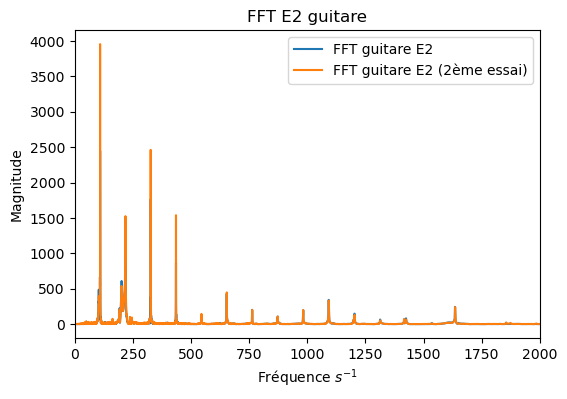

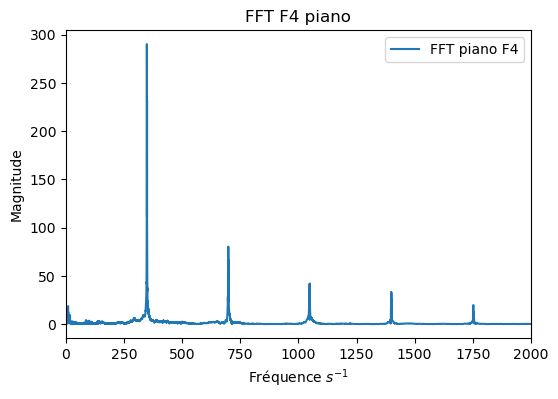

In [81]:
# guitar
y_guitar_freq, y_guitar_mag = plot_fourier(y_guitar, 44100)
y_guitar2_freq, y_guitar2_mag = plot_fourier(y_guitar2, 44100)
# piano
y_f4_freq, y_f4_mag = plot_fourier(y_f4, 44100)

# Plot FFT with peaks marked
fig, ax = plt.subplots(1,1, figsize=(6,4))
ax.plot(y_guitar_freq, y_guitar_mag, label="FFT guitare E2")
ax.plot(y_guitar2_freq, y_guitar2_mag, label="FFT guitare E2 (2ème essai)")
#ax.axvline(350, color="black", linestyle="dashed", alpha=0.5, label="Fréquence du note joué")
ax.set_title("FFT E2 guitare")
ax.set_xlabel(r"Fréquence $s^{-1}$")
ax.set_ylabel("Magnitude")
ax.set_xlim(0, 2000)  # Limit frequency range for better visualization
ax.legend()
plt.show()

fig, ax = plt.subplots(1,1, figsize=(6,4))
ax.plot(y_f4_freq, y_f4_mag, label="FFT piano F4")
#ax.axvline(350, color="black", linestyle="dashed", alpha=0.5, label="Fréquence du note joué")
ax.set_title("FFT F4 piano")
ax.set_xlabel(r"Fréquence $s^{-1}$")
ax.set_ylabel("Magnitude")
ax.set_xlim(0, 2000)  # Limit frequency range for better visualization
ax.legend()
plt.show()

# fig, ax = plt.subplots(1,1, figsize=(6,4))
# ax.plot(y_c6_freq, y_c6_mag, label="FFT c2")
# #ax.axvline(350, color="black", linestyle="dashed", alpha=0.5, label="Fréquence du note joué")
# ax.set_title("FFT c6")
# ax.set_xlabel(r"Fréquence $s^{-1}$")
# ax.set_ylabel("Magnitude")
# ax.set_xlim(0, 10000)  # Limit frequency range for better visualization
# ax.legend()
# plt.show()

***Notes:***<br>
-	lower register, strings are thicker and heavi-er and longer to allow lower frequency of vibration but thus string is more rigid and does not easily let higher frequency har-monics thus the overtones and harmonics all rest in the lower register. The string vi-brates longer in the lower register with a smaller decay. 
-	Lower register C2 produce much more overtones of closer magnitude even having the frequency played much smaller in am-plitude compared to its 2nd harmonic or 3rd harmonic. While C6 puts almost all its energy in the fundamental, leaving all its harmonics of very weak magnitude.
-	The piano soundboard is designed to effi-ciently project the mid-upper register thus leaving the lower register not quite project-ed well leaving a muddier sound.
-	Bass hammers are soft (in the lower regis-ter) to avoid harshness when struck on the thicker metallic string. A compromise that leads to a warmer tone like its middle and upper register however it reduces the clari-ty of the note (not exactly point contact on the string in our hypotheses)
-	In a guitar, this isn’t the case but the guitars body is like a piano which is more efficient in projecting mid and upper frequencies, but the strings thickness is negligible with respect to its length.
-	In terms of the envelope characteristics be-tween the guitar and the piano, the guitar decays faster when plucked and has a shorter sustain period because of it. How-ever, along the range of frequencies the guitar rests about the same in terms of waveshape, envelope characteristics and overtone magnitudes, while the piano var-ies greatly. Therefore, our hypothesis for the initial conditions of the 
hammers of a piano striking the strings are somewhat lacking in rigidity and applies cleaner to the guitar while the conditions must be reviewed and might vary depend-ing on the range on the keys.
-	The initial conditions of a guitar in fact must be reviewed as we commonly strike the guitar not in the middle but closer to the fix point of the guitar which affects the harmonics generated, thus we have studied this difference for different plucking posi-tion along one open string of the guitar.
-	After, it’s the study on the feeling of unison present in a group of notes played at once (i.e. a chord).


## **Partie 2**
### Étude de l'harmonicité d'un accord

### 2.1 Première approche : à partir des notes séparés

-  multiplicité des spéctres

Préparer les enrègistrement audios

### 2.2 À partir d'un accord unique

-  analyse à partir des fondamentales